### Importamos las librerias

In [1]:
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import Ridge

### Función para representar fronteras en clasificadores

In [2]:
def plot_decision_boundaries(X, y, classifier):
    # fuente https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    Xd = X.values
    yd = y.values
    x_min, x_max = Xd[:, 0].min() - 1, Xd[:, 0].max() + 1
    y_min, y_max = Xd[:, 1].min() - 1, Xd[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xd[:, 0], Xd[:, 1], c=yd, s=20, edgecolor="k")
    plt.show()

In [4]:
df_wine = pd.read_csv('wine.txt', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Tal y como hemos visto en clase, siempre es recomendable comenzar realizando una representación de los datos para poder extraer una serie de conclusiones preliminares que nos permitan encaminar el estudio de dichos datos de forma correcta

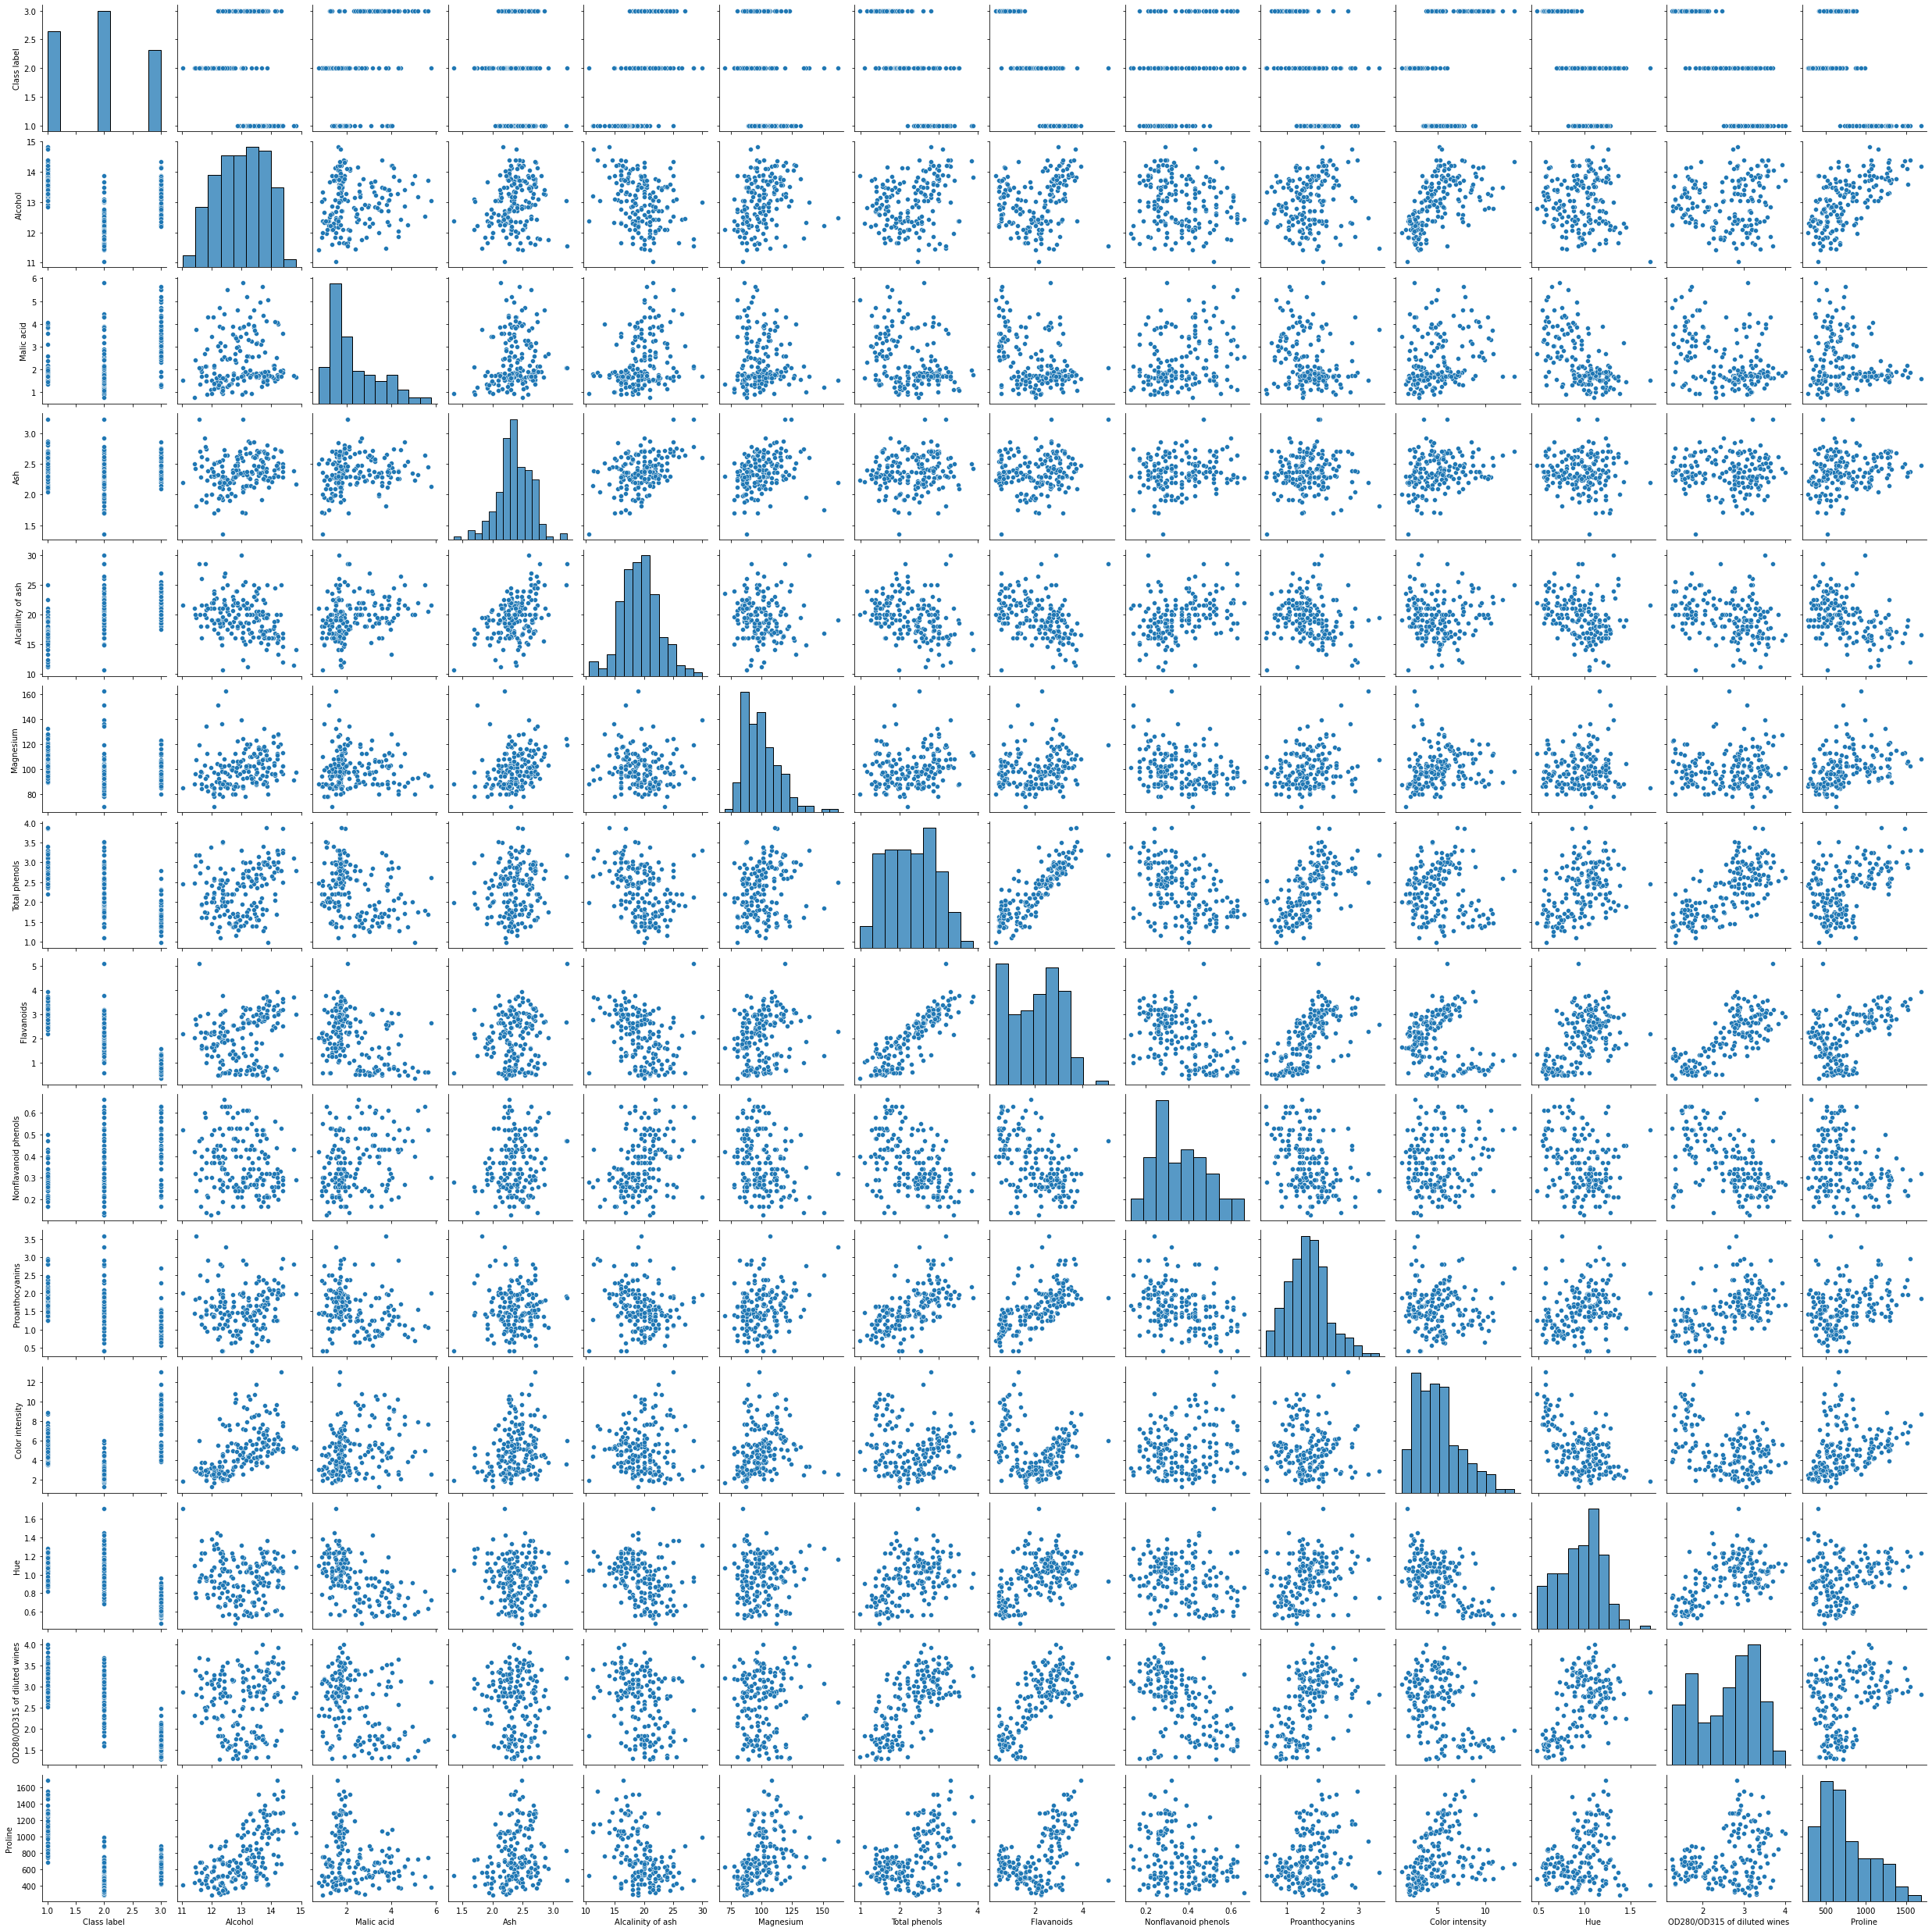

In [4]:
# Dibujamos en 2D las nubes de puntos, separados en parejas de características
sns.pairplot(df_wine)

In [ ]:
'''
Al ejecutar la instrucción anterior aparecen muchas representaciones. En concreto, en la diagonal aparece el 
histograma de una variable (representación de dicha variable respecto a ella misma). Fuera de la diagonal aparecen
las rerpesentaciones de una variable frente a otra. Se representan todas las combinaciones posibles.

La primera conclusión que podemos extraer del estudio es que no se ven relaciones tan claras entre las variables. 
Las nubes de puntos por lo general son dispersas, aunque en algunos casos
se deja entrever un cierto patrón lineal, como es el caso de la representación de la variable Alcalinity of ash
en función de la variable Ash, o también en la representación de la variable Prolina (es un aminoácido que forma 
parte de las proteínas de los seres vivos) frente a la cantidad de alcohol. Hay varios ejemplos más donde se 
percibe una relación lineal entre variables: Total Phenols frente a Flavanoids (quizás es la relación más lineal
de todas), Proline frente a Flavaoids (son una sustancia química polifenólica)... 

Por contra, hay otros ejemplos donde no se aprecia ningún tipo de relación a priori (son nubes de puntos muy 
dispersos, sin ninguna relación aparente), como es el caso de Nonphlavanoid fenol frente a Color intensity o Malic
acid frente a Nonflavanoid phenols. En casos donde no se ve una relación clara podemos tener en mente que a la 
hora de hacer una clasificación puede sernos de ayuda una SVM. La SVM intentará representar los datos en una 
dimensión mayor para poder separarlos linealmente en dicha dimensión. Lo corroboraremos con las pruebas posteriores

'''

# Regresión lineal

0.857739335189833
[ 4.83511619e-03 -4.21469140e-02  4.93053883e-01 -2.32472945e-02
 -3.55874477e-03  7.05825049e-01 -1.00018339e+00  2.83983660e-01
  1.06758262e-04  4.38721584e-01  3.20802903e-01  9.55717879e-05]


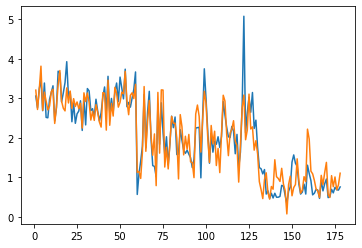

In [32]:
'''
Comenzamos probando con una regresión lineal para predecir el valor de la variable Flavanoids frente al resto. 
Hemos dedicido empezar por esto porque ojeando las gráficas anteriores parece que la variable Flavanoids tiene
varias relaciones lineales respecto al resto de variables, por lo que pensamos que a priori podríamos conseguir
un buen R2 en regresión. 

'''

y = df_wine['Flavanoids'] # Flavanoids, es lo que queremos predecir
X = df_wine[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']] 

lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)

plt.figure()
plt.plot(np.arange(1,179), y, np.arange(1,179), y_pred)

print(lr.score(X,y))
print(lr.coef_)

In [ ]:
'''
Se comprueba al ejecutar la regreisión anterior que el coeficiente R2 es de 0.8577, lo cual indica que la 
predicción es relativamente buena. La curva naranja es la predicción y la azul la verdad de referencia. Como vemos
no es del todo preciso pero no está mal. Además, al estudiar los coeficientes de la regresión obtenidos sí que 
apreciamos que algunos son negativos (los correspondientes a Malic acid, Alcalinity of ash, magensium y 
Nonflavanoids phenol). Esto puede sugerir que esas variables están correladas con otras, es decir, que su aumento
va implícito en el aumento de otra variable que sí tenga un coeficiente positivo, o también puede sugerir que la
relación de la variable que predecimos con la regresión (Flavanoids) es inversamente proporcional a esas variables
que tienen un coeficiente de regresión negativo. 

Otro aspecto que podemos tener en cuenta a la hora de estudiar los datos en la representación realizada al comienzo
del fichero es que la variable Flavanoids tiene un comportamiento respecto al resto de variables que se puede 
diferenciar en dos grupos. Por una parte exhibe una relación lineal con varias de las variables, mientras que no
apreciamos una relación clara con el resto. Por tanto, vamos a repetir la regresión lineal para predecir el valor
de la variable Flavanoids en función solamente de las variables con las que parece tener una relación lineal. 
Después, repetiremos la regresión pero prediciendo el valor de Flavanoids en función de aquellas variables con las
que no parece tener ninguna relación clara.
'''

0.8516784790125838
[ 8.53863453e-03  2.59258961e-01 -9.51088912e-01  7.35916158e-01
  2.53769879e-01  5.53916172e-01  3.37537651e-01  1.71914205e-04]


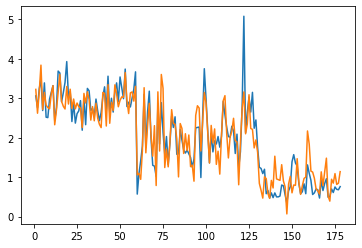

In [41]:
# Predecimos la variable Flavanoids en función de las variables con las que sí parece tener una relación lineal

y = df_wine['Flavanoids'] # Flavanoids, es lo que queremos predecir
X = df_wine[['Alcohol','Total phenols', 'Proanthocyanins', 'Hue', 'OD280/OD315 of diluted wines','Proline']] 

lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)

plt.figure()
plt.plot(np.arange(1,179), y, np.arange(1,179), y_pred)

print(lr.score(X,y))
print(lr.coef_)

0.5016463756839993
[-2.04210284e-01  1.55138021e+00 -3.40288989e+00 -9.62361170e-02
 -3.06784152e-03 -6.55201170e-02]


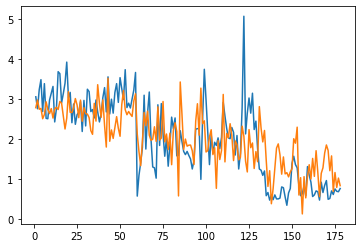

In [43]:
# Ahora, predecimos Flavanoids en función de las variables con las que no parece tener una regresión clara

y = df_wine['Flavanoids'] # Flavanoids, es lo que queremos predecir
X = df_wine[['Malic acid', 'Ash' , 'Nonflavanoid phenols', 'Alcalinity of ash', 'Magnesium', 'Color intensity']] 

lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)

plt.figure()
plt.plot(np.arange(1,179), y, np.arange(1,179), y_pred)

print(lr.score(X,y))
print(lr.coef_)

In [ ]:
'''
La conclusión a la vista de las dos salidas anteriores es clara. 

En primer lugar, si estimamos Flavanoids usando solo las variables con las que exhibe un comportamiento 
relativamente lineal obtenemos casi el mismo R2 que cuando usábamos todas las variables 
(hemos pasado de predecir con 13 variables a predecir solo con 6). Además, ahora todos los coeficientes
de la regresión son positivos, algo que también podíamos esperar a la vista de las gráficas, donde la relación
entre Flavanoids y el resto de variables con las que tiene una dependencia lineal es directamente porporcional. 
También podemos ver que no existe una colinealidad entre las variables que se refleje en forma de coeficiente 
de regresión negativo. Por el valor de los coeficientes diríamos que la relación es más débil frente a las 
variables Alcohol y Proline que frente al resto.

En segundo lugar, al predecir Flavanoids mediante regresión lineal usando como variables para la predicción 
aquellas con las que no parece tener una relación clara, vemos que el R2 disminuye drásticamente, siendo el
número de variables usadas en un caso y en otro el mismo prácticamente. Esto entra dentro
de lo que esperábamos, ya que estamos intentando establecer una relación lineal entre variables que parecen no 
estar relacionadas, al menos de manera lineal. Vemos que varios coeficientes son negativos, lo cual puede indicar
una colinealidad con otra variable. Sí que me llama la atención el alto valor de los coeficientes relativos a las
variables Ash y Nonflavanoids phenol. Pienso que puede querer decir que quizá si exista una relación entre esas
variables y la que queremos predecir que pueda ser aprovechada por la regresión lineal, por lo que a continuación
realizaré el mismo procedimiento pero cambiando las variables Ash y Nonflavanoids phenol a la regresión de las
variables que sí tienen una relación con Flavanoids

'''

0.8516784790125838
[ 8.53863453e-03  2.59258961e-01 -9.51088912e-01  7.35916158e-01
  2.53769879e-01  5.53916172e-01  3.37537651e-01  1.71914205e-04]


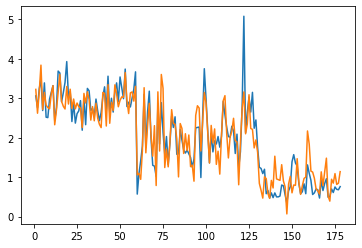

In [42]:
# Predecimos la variable Flavanoids en función de las variables con las que sí parece tener una relación lineal

y = df_wine['Flavanoids'] # Flavanoids, es lo que queremos predecir
X = df_wine[['Alcohol', 'Ash' , 'Nonflavanoid phenols', 'Total phenols', 'Proanthocyanins', 'Hue', 'OD280/OD315 of diluted wines','Proline']] 

lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)

plt.figure()
plt.plot(np.arange(1,179), y, np.arange(1,179), y_pred)

print(lr.score(X,y))
print(lr.coef_)


0.2678783064462007
[-0.26539086 -0.07413524  0.01294455 -0.05637465]


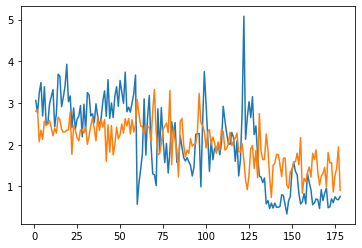

In [44]:
# Ahora, predecimos Flavanoids en función de las variables con las que no parece tener una regresión clara

y = df_wine['Flavanoids'] # Flavanoids, es lo que queremos predecir
X = df_wine[['Malic acid', 'Alcalinity of ash', 'Magnesium', 'Color intensity']] 

lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)

plt.figure()
plt.plot(np.arange(1,179), y, np.arange(1,179), y_pred)

print(lr.score(X,y))
print(lr.coef_)

In [ ]:
'''
Vemos como la regresión en el primer caso ha mejorado y se acerca todavía más al R2 de la regresión con todas las
variables, mientras que la regresión de aquellas variables no relacionadas a priori con Flavanoids se desploma 
aun más. Esto creo que puede deberse que efectivamente las variables que han cambiado de bando (Ash y 
Nonflavanoids phenol) tenían una relación con Flavanoids que no supe detectar, aunque en este caso también 
atribuyo parte de la diferencia entre los dos casos a que en el primero estoy usando 9 de las 13 variables y en el
segundo solo 4. De todas formas, es normal que el segundo salga tan mal, ya que solo uso 4 variables que a priori
parecen no tener ninguna relación con la variable a predecir, mientras que en el primero uso 9 de las 13 variables
y a priori bastantes de ellas guardan una relación lineal con Flavanoids.

'''

### A continuación veremos cómo de bueno es nuestro modelo generalizando, para lo cual separaremos un conjunto de entrenamiento y uno de test. Usaré para esto solo las variables que han demostrado ser útiles al llevar a cabo la regresión

In [91]:
# Exploramos la capacidad de generalización
y = df_wine['Flavanoids'] # Flavanoids, es lo que queremos predecir
X = df_wine[['Alcohol', 'Ash' , 'Nonflavanoid phenols', 'Total phenols', 'Proanthocyanins', 'Hue', 'OD280/OD315 of diluted wines','Proline']] 


# Separo train - test, 70% train y 30% test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr3 = LinearRegression().fit(X_train, y_train)

print(lr3.coef_)
print(lr3.score(X_train, y_train)) # Precision con los datos de entrenamiento, el score da el valor absoluto
print(lr3.score(X_test, y_test))   # Precision con los datos de test, es lo interesante, lo que me dice si mi 
                                   # modelo es util o no

[-8.34504179e-03  2.71750493e-01 -8.09617813e-01  8.52475894e-01
  1.61319658e-01  5.95642682e-01  3.23680020e-01 -2.82181118e-05]
0.8450828040769508
0.8428475888628798


In [ ]:
'''
Vemos que el R2 es prácticamente el mismo, tanto en trainning como en test, lo cual indica que el modelo es capaz 
de generalizar correctamente y no se está ajustando a los datos de entrenamiento. Lo que sí que vemos es que 
aparecen algunos coeficientes negativos, los cuales pueden estar indicando correlación entre las variables. Podemos
aplicar una regresión Ridge para solucionar esto, ya que a priori es contraintuivio
'''

In [92]:
ridge = Ridge(alpha=5).fit(X_train, y_train) 

# Imprimos las puntuaciones para comparar
print(ridge.coef_)
print(ridge.score(X_train, y_train)) 
print(ridge.score(X_test, y_test))

[-2.64166306e-02  1.11315170e-01 -1.78746584e-01  7.24105559e-01
  2.08644403e-01  2.60104778e-01  4.22271426e-01  2.12417551e-04]
0.834178674899292
0.8455357100606018


In [ ]:
'''
Al hacer la regresión Ridge podemos intentar solucionar la colinealidad, que se refleja en coeficientes negativos
y sobre todo en coeficientes inestables, ya que como puede verselos coeficientes entre una ejecucion y otra 
cambian mucho. Con el ridge son más similares, aunque el negativo en el primer coeficiente (el del alcohol) 
no desaparece por mucho que aumentemos el parámetro alfa, a costa de reducir el R2. Esto puede indicar que el 
alcohol está muy correlacionado con otra(s) variable(s). Lo que sí vemos con alfa = 5 es que mejora en test, algo
que puede ocurrir con Ridge, ya que da una estabilidad al modelo que beneficia al test.

'''

# Clasificación

In [117]:
# CLASIFICACION

# Clasificar la bodega en funcion de algunas variables
y = df_wine['Class label']
X = df_wine[['Flavanoids','Color intensity']]


# Usaremos maquinas de soporte vectorial, que a priori solo separan dos clases, pero como veremos funcionan bien.

# Esta primera es lineal, intentara separar los puntos con un plano sin más.
svm1 = SVC(kernel='linear', C=1.0, random_state=1).fit(X.values, y.values)

# Esta segunda es no lineal, intentará transformar los datos a otra dimensión mayor para que allí sean linealmente
# separables. Como vemos, funcionará mejor
svm2 = SVC(kernel='rbf', gamma=0.1, C=10.0, random_state=1).fit(X.values, y.values)



0.898876404494382
0.9269662921348315


/opt/homebrew/Caskroom/miniforge/base/envs/applemetal/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/applemetal/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


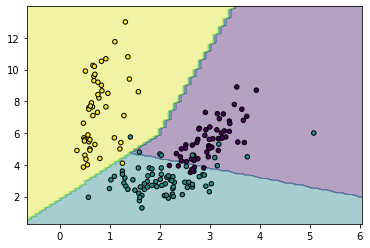

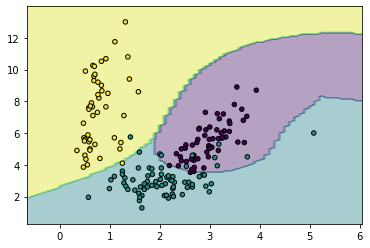

In [118]:
print(svm1.score(X,y))
print(svm2.score(X,y))

plot_decision_boundaries(X, y, svm1)
plot_decision_boundaries(X, y, svm2)